<a href="https://colab.research.google.com/github/nikilstark/Digit-Recognizer/blob/master/DigitRecognizer_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**2D CNN**


In [0]:
!pip install tensorflow-gpu==2.0.0-rc0

     |████████████████████████████████| 380.5MB 26kB/s 
     |████████████████████████████████| 501kB 16.2MB/s 
     |████████████████████████████████| 4.3MB 44.1MB/s 


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPool2D

In [0]:
from tensorflow.keras.datasets import mnist

In [0]:
(x_train,y_train),(x_test,y_test)= mnist.load_data()                  

11493376/11490434 [==============================] - 0s 0us/step


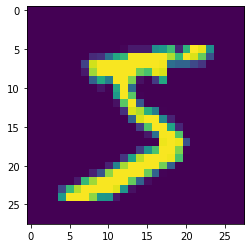

In [0]:
plt.imshow(x_train[0])

In [0]:
x_train.shape

(60000, 28, 28)

In [0]:
x_test.shape

(10000, 28, 28)

In [0]:
x_train = x_train/255.0
x_test = x_test/255.0

In [0]:
x_train = x_train.reshape(60000,28,28,1)
x_test = x_test.reshape(10000,28,28,1)

In [0]:
x_train[0].shape

(28, 28, 1)

In [0]:
input_shape = x_train[0].shape

In [0]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
model.add(Conv2D(filters=64,kernel_size=(3,3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [0]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0

In [0]:
model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [0]:
history = model.fit(x_train,y_train,batch_size=128,epochs=10,verbose=1,validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 166s 3ms/sample - loss: 0.2393 - accuracy: 0.9268 - val_loss: 0.0499 - val_accuracy: 0.9844
Epoch 2/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0870 - accuracy: 0.9745 - val_loss: 0.0372 - val_accuracy: 0.9874
Epoch 3/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0650 - accuracy: 0.9804 - val_loss: 0.0351 - val_accuracy: 0.9888
Epoch 4/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0538 - accuracy: 0.9840 - val_loss: 0.0307 - val_accuracy: 0.9904
Epoch 5/10
60000/60000 [==============================] - 164s 3ms/sample - loss: 0.0454 - accuracy: 0.9859 - val_loss: 0.0298 - val_accuracy: 0.9906
Epoch 6/10
60000/60000 [==============================] - 163s 3ms/sample - loss: 0.0397 - accuracy: 0.9875 - val_loss: 0.0310 - val_accuracy: 0.9901
Epoch 7/10
60000/60000 [==========================

In [0]:
model.evaluate(x_test,y_test)

10000/1 [===============================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.02496278431475548, 0.9921]

In [0]:
def plot_learningcurve(history,epochs):
  epoch_range = range(1,epochs+1)
  plt.plot(epoch_range,history.history['accuracy'])
  plt.plot(epoch_range,history.history['val_accuracy'])
  plt.title('model accuracy')
  plt.ylabel('accuracy')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

  plt.plot(epoch_range,history.history['loss'])
  plt.plot(epoch_range,history.history['val_loss'])
  plt.title('model loss')
  plt.ylabel('loss')
  plt.xlabel('epoch')
  plt.legend(['train','val'],loc='upper left')
  plt.show()

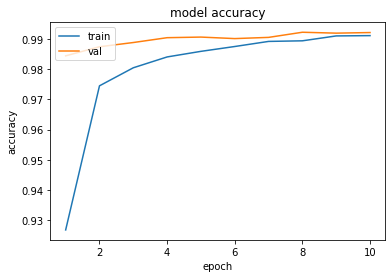

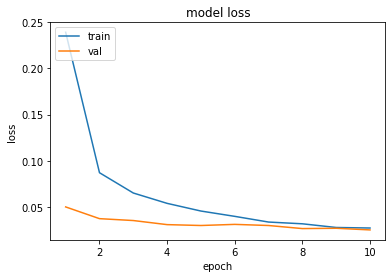

In [0]:
plot_learningcurve(history,10)